# Avocado Price prediction- A regression problem<br>
Avocado is a fruit and it is liked by United state people mostly. it comes in different varieties and sizes. Product code is also given to them. There has also grown in two ways one is conventional and second one in organic ways. it is labeled as organic after meeting all the organic compliance patameters.<br><br>
**About dataset:**<br>
Dataset has pure 1517 observations with 13 columns including one target. Dataset has lot of missing values which needs treatment. features details are mentioned below<br>

**Feature details**<br>
Date == The date of the observation<br>
AveragePrice == the average price of a single avocado<br>
type == conventional or organic<br>
year == The year<br>
Region == the city or region of the observation <br>
Total Volume == Total number of avocados sold <br>
4046 ==  Total number of avocados with PLU 4046 sold<br>
4225 ==  Total number of avocados with PLU 4225 sold<br>
4770 ==  Total number of avocados with PLU 4770 sold<>
Total Bags == Numbe of bags used 
Small Bags == number of small bag used
large bags =  Number of large bag used
XLarge bags = number of Xtra lage bag used



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
avocado_ds = pd.read_csv("Avacado_data.csv")

In [2]:
avocado_ds.head() # checking top 5 observations

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
avocado_ds.tail()# checking last 5 observations

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking first 5 and last 5 observations, looking at the tail of the data, we have missing data in the dataset.<br>Also we ahve unnamed column in it which seems an index values. we will delete that. let check more info about the dataset's features

In [4]:
avocado_ds.info() # checking information about the data set and its columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


Info function gives information that no missing value in the data but while checking the tail, it has obsered some missing data. we will correct that. <br> we have 13 columsn including Target column. 3 columsn are objects type and resta are all numeric in nature. we have date column also which is current object type, we will change its data type as well to datetime

In [5]:
# deleting the unnamed column from the dataset as it has its own index
avocado_ds.drop("Unnamed: 0",axis=1, inplace = True)

In [6]:
# checking the shape of the dataset and columns in it
print(avocado_ds.shape)
print(avocado_ds.columns)

(16468, 13)
Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


Unnamed has been deleted successfully from the data set. now we will clean the dataset.

In [7]:
# creating deep copy 
avocado_ds_work_file = avocado_ds.copy()

In [8]:
# replace the NaN with np.nan just to ensure it NaN wasnt actual NAN. 
avocado_ds_work_file.replace({"NaN": np.nan},inplace=True)

In [9]:
# function for checking missing values
def missing_val(x):
  missing = {}
  for i in avocado_ds_work_file.columns:
    if avocado_ds_work_file[i].isnull().sum()> 0:
      missing[i] = avocado_ds_work_file[i].isnull().sum()
  print(missing,end = " ")

In [10]:
# calling the function
missing_val(avocado_ds_work_file)
print("\n")
print("Percentage of missing data:\n",avocado_ds_work_file.isnull().sum()/len(avocado_ds_work_file)*100)

{'Date': 14951, 'AveragePrice': 14951, 'Total Volume': 14951, '4046': 14951, '4225': 14951, '4770': 14951, 'Total Bags': 14951, 'Small Bags': 14951, 'Large Bags': 14951, 'XLarge Bags': 14951, 'type': 14951, 'year': 14951, 'region': 14951} 

Percentage of missing data:
 Date            90.788195
AveragePrice    90.788195
Total Volume    90.788195
4046            90.788195
4225            90.788195
4770            90.788195
Total Bags      90.788195
Small Bags      90.788195
Large Bags      90.788195
XLarge Bags     90.788195
type            90.788195
year            90.788195
region          90.788195
dtype: float64


we have seen that actual data points are only 1517 out of 16000 plus observations. approx 91% data is missing and we cant impute it, we will have to delete them.

In [11]:
# dropping null value
avocado_ds_work_file.dropna(inplace=True)
missing_val(avocado_ds_work_file) # checking missing value again

{} 

Missing value has been removed from the data set and we are ok to move ahead with othe analysis. 

In [12]:
# we have date column also in dataset and its datatype is objects, lets change into datetime format
avocado_ds_work_file["Date"] = pd.to_datetime(avocado_ds_work_file["Date"])
avocado_ds_work_file.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [13]:
# updating original files
avocado_ds = avocado_ds_work_file.copy()

In [14]:
avocado_ds.describe().round(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.00000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.00000,1517.00000
mean,1.07499,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.77107,2015.16282
std,0.18889,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.71214,0.36932
min,0.49000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.00000,2015.00000
25%,0.98000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.00000,2015.00000
50%,1.08000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.00000,2015.00000
75%,1.19000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.48000,2015.00000
max,1.68000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.79000,2016.00000


By dignosing the data point, i have found that small and large bags are bifurcation of total bags so we can keep only total bags instead of them.we will treat them in coming section

In [15]:
avocado_ds.select_dtypes(include="object").describe()# describing the objects data types

,type,region
count,1517,1517
unique,1,51
top,conventional,California
freq,1517,76


From this we can understand that all Avocado belongs to one category which is conventional and dataset has maximum data from california state

# **EDA**

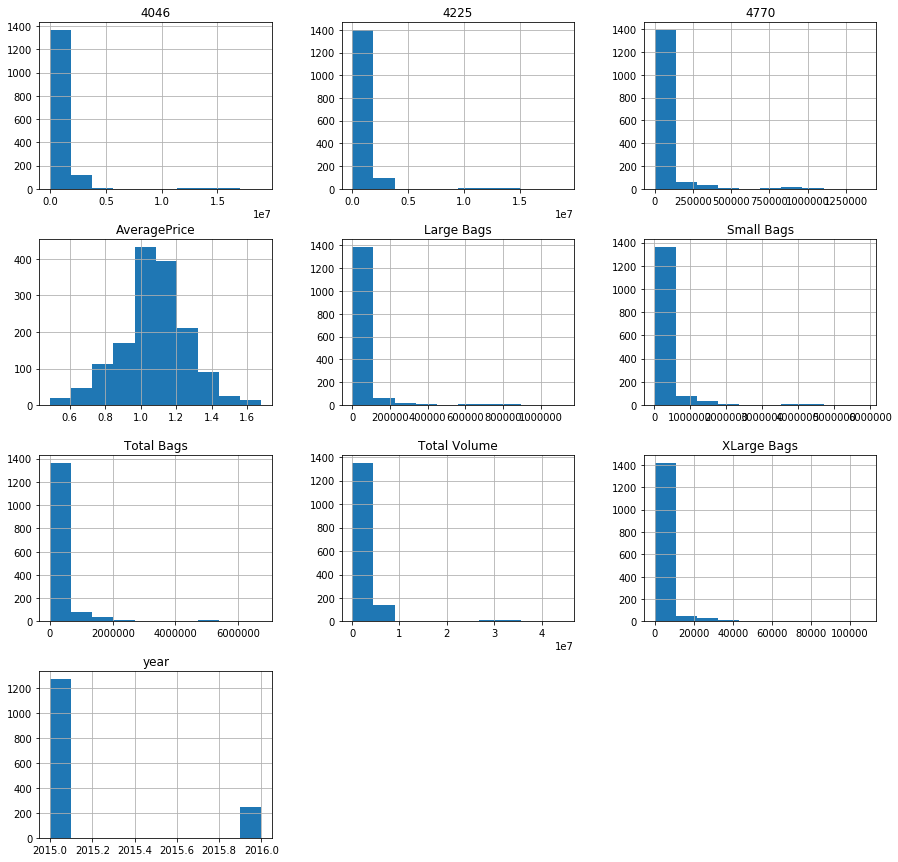

In [16]:
# checking the distribution of the numeric features
avocado_ds.select_dtypes(exclude="object").hist(figsize= (15,15)); 

from total volume to XLage bags' features are right skewed. lets check the skewness of the data and after that we will do some analysis. so for checking the skewness we will take numeric data into another variable but before that we need to change the name of the 3 columsn which are written in number so that we can take them as features

In [17]:
avocado_ds.rename(columns={"4046":"PLU_4046","4225":"PLU_4225","4770":"PLU_4770"},inplace=True)
avocado_ds.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [18]:
# saving numeric data into a variable for nmeric operation
num_data = avocado_ds[["Total Volume",	"PLU_4046"	,"PLU_4225",	"PLU_4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]

In [19]:
# checking the skewness
num_data.skew()

Total Volume    6.200138
PLU_4046        6.051830
PLU_4225        6.394926
PLU_4770        5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
dtype: float64

all the columns are skewed one as we have seen in the histogram. we will treat them after EDA.<br><br> i am creating a deep copy of the data and adding some more feature in the dataset for the analysis purpose from datetime columns.<br><br>

i have observed that date format is not same from top to tail, so changing it in a proper manner. DD-MM-YYYY

In [20]:
avocado_ds_analysis_data = avocado_ds.copy() # creating a copy for further analysis

In [21]:
avocado_ds_analysis_data["Date"] = pd.to_datetime(avocado_ds_analysis_data["Date"],format = "%d/%m/%Y") 

In [22]:
avocado_ds_analysis_data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU_4046               float64
PLU_4225               float64
PLU_4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

Date format has been changed for entire column and it has seme for all observation

In [23]:
avocado_ds_analysis_data["Day"] =  avocado_ds_analysis_data["Date"].dt.day
avocado_ds_analysis_data["year"] =  avocado_ds_analysis_data["Date"].dt.year
avocado_ds_analysis_data["Month"] =  avocado_ds_analysis_data["Date"].dt.month
avocado_ds_analysis_data["week"] =  avocado_ds_analysis_data["Date"].dt.week

In [24]:
avocado_ds_analysis_data.head()


,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,50
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,24
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,48


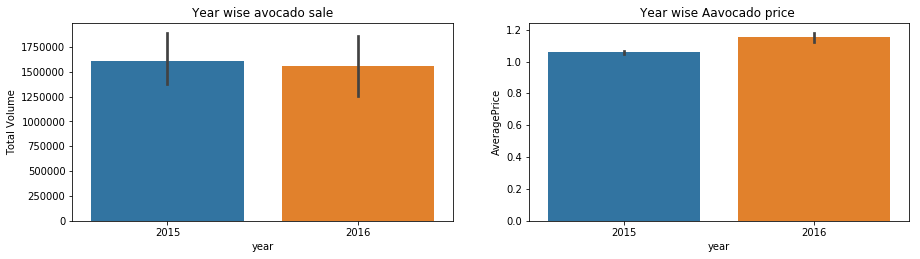

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.barplot(x = "year", y = "Total Volume", data = avocado_ds_analysis_data)
plt.title("Year wise avocado sale");

plt.subplot(222)
sns.barplot(x = "year", y = "AveragePrice", data = avocado_ds_analysis_data)
plt.title("Year wise Aavocado price ");


Avocado number of sold in the year of 2015 is more as compared to 2016 but when we compare the year wise avocado price,  2016 year wise price average is high for as compared to 2015 and it can be 

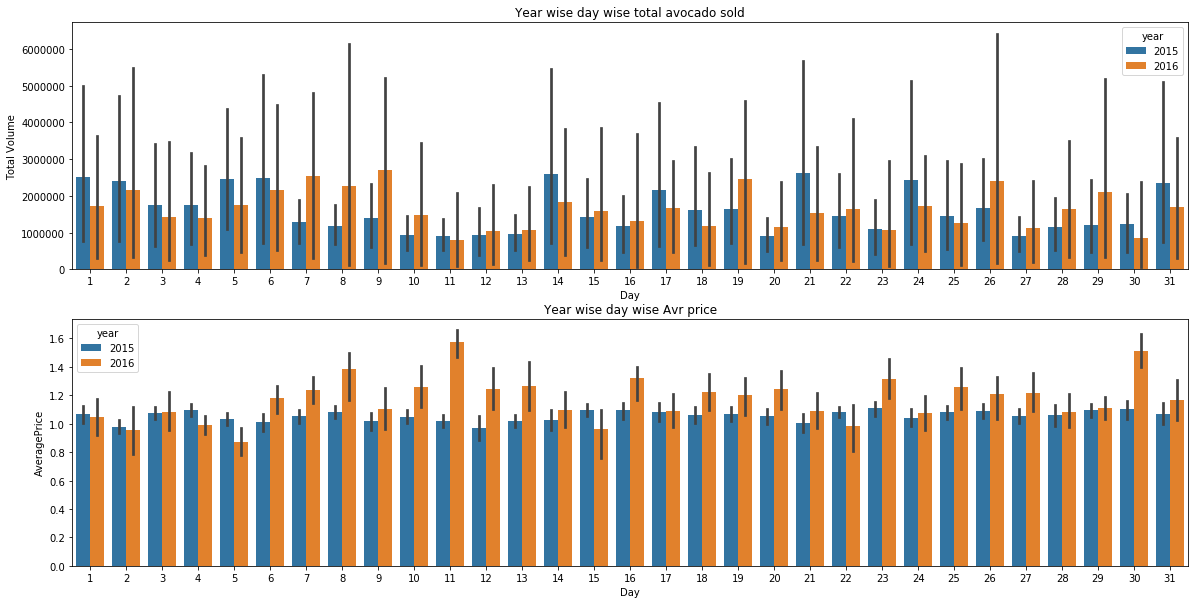

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "Day", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("Year wise day wise total avocado sold");

plt.subplot(212)
sns.barplot(x = "Day", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("Year wise day wise Avr price");

out of 31 days, 13 days ,total sold count was higher in 2015 and rest are all in 2016.<br>
in 2016 on 11th and 30th , the avg price were high.

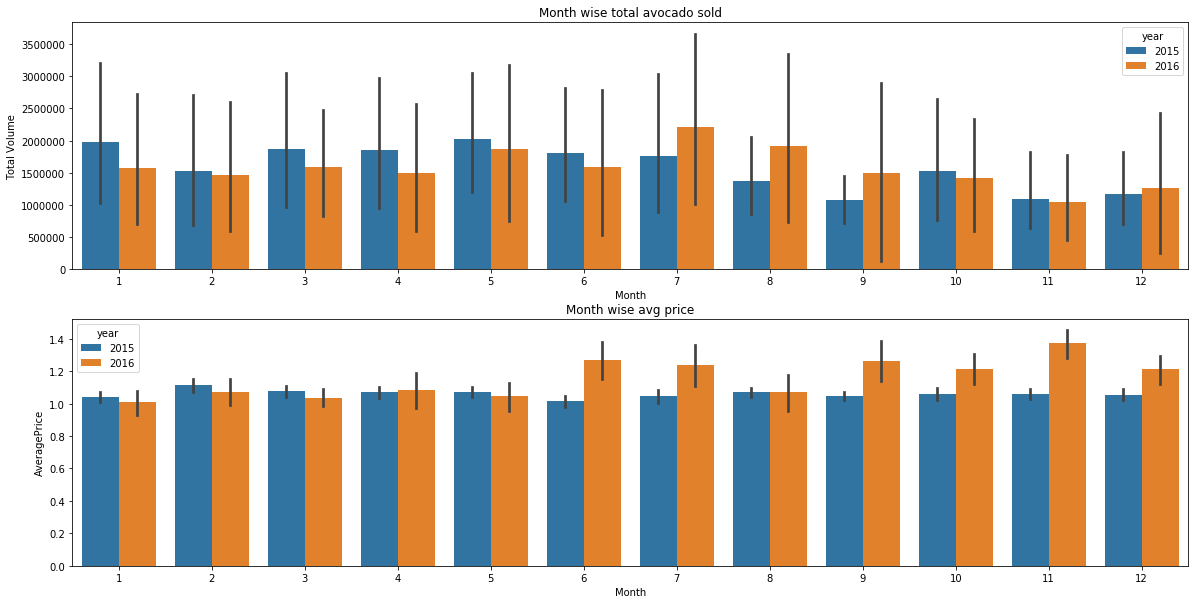

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "Month", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("Month wise total avocado sold")

plt.subplot(212)
sns.barplot(x = "Month", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("Month wise avg price");

we see that in the 6th month in 2016 total volume is less but avg price is high. similarly we can observe the reverse of the same in 4th, 10 and 11 months, may be in these months organic avocado sold, i cannot be sure, having said that total volum of avocado is containing some other variate of avocado also because conventional avocado's count doesnt match with total volume.

Text(0.5, 1.0, 'week wise avg price')

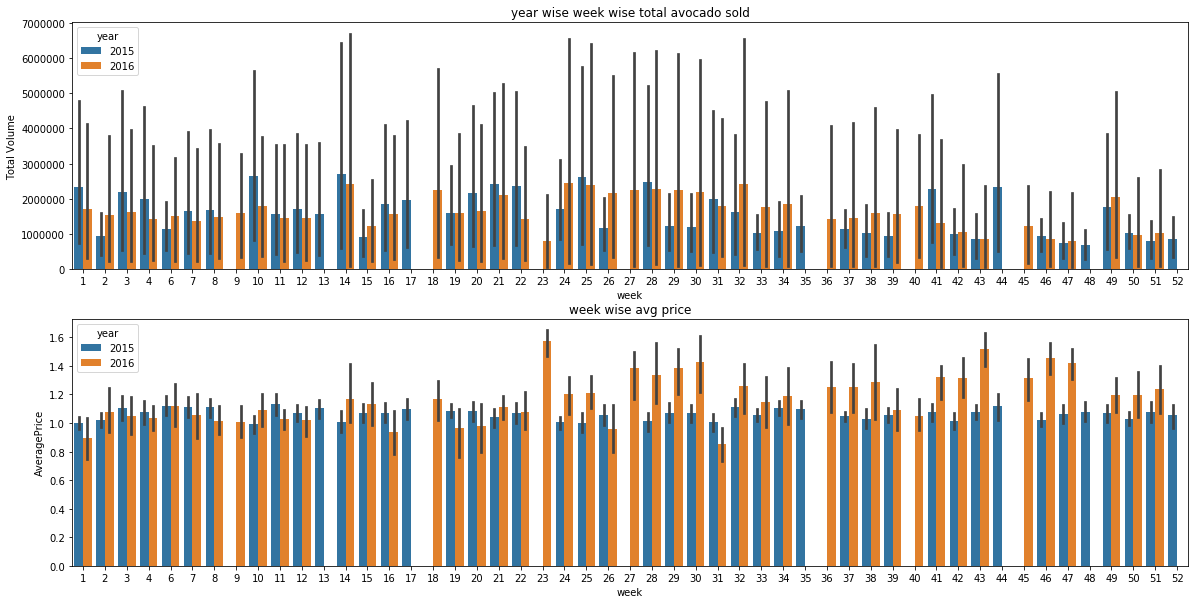

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "week", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("year wise week wise total avocado sold")

plt.subplot(212)
sns.barplot(x = "week", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("week wise avg price")

week wise data looks cmulsy but we still make out some observations. <br>
after week 23, we see that ave price is high as compared to earlier weeks in most of the weeks. 

In [29]:
avocado_ds.groupby("region")[["Total Volume","AveragePrice"]].mean().sort_values(by ="Total Volume" ,ascending = False)

,Total Volume,AveragePrice
region,,
TotalUS,3.293714e+07,1.011600
California,6.035277e+06,1.055921
West,5.574939e+06,0.940833
SouthCentral,5.496995e+06,0.818718
Northeast,3.465864e+06,1.236667
GreatLakes,3.276358e+06,1.107222
Southeast,3.055239e+06,1.091111
LosAngeles,2.732180e+06,0.863333
Midsouth,2.355099e+06,1.081111


Top 5 region where it has consumed a lot and those are California,west,southcentral , northeast and greatlakes.

**lets check the outlier in the dataset but before do that we will delete some columns whcih just an extent of one column and share the similar observation**<br>
Small and large bag are the extension of the total bag thus we are deleteing it.type column has only one value that avocado is conventional type so we can delete it.
 

In [30]:
avocado_ds.drop(columns=["Small Bags","Large Bags"],axis = 1, inplace = True)

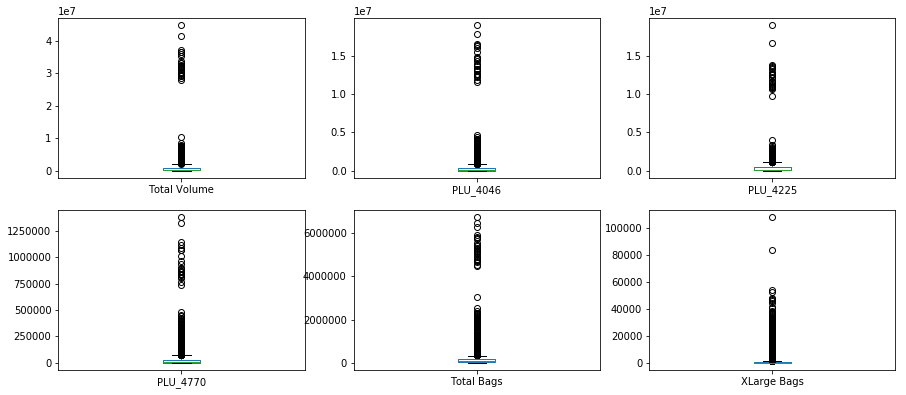

In [31]:
num_data = avocado_ds_analysis_data[["Total Volume","PLU_4046"	,"PLU_4225",	"PLU_4770","Total Bags","XLarge Bags"]]

num_data.plot(kind = "box", subplots = True, layout=(3,3), figsize = (15,10));

All numeric columns are full with outlier let treat them but before doing that we will encode cateorical variables.

# Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

lb = LabelEncoder()
lb.fit(avocado_ds["region"])

avocado_ds["region"] = lb.transform(avocado_ds["region"])

In [33]:
avocado_ds.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.0,conventional,2015.0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.0,conventional,2015.0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.0,conventional,2015.0,0
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.0,conventional,2015.0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.0,conventional,2015.0,0


In [34]:
avocado_ds.tail(10)

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,XLarge Bags,type,year,region
1507,2016-11-20,1.57,135608.11,44044.69,28907.47,13913.04,48742.91,0.00,conventional,2016.0,7
1508,2016-11-13,1.64,144089.12,49399.39,26597.39,22714.68,45377.66,0.00,conventional,2016.0,7
1509,2016-06-11,1.57,142095.92,36840.74,27501.34,25305.86,52447.98,0.00,conventional,2016.0,7
1510,2016-10-30,1.58,142955.49,39376.44,29382.30,26881.22,47315.53,240.28,conventional,2016.0,7
1511,2016-10-23,1.52,167741.27,54981.90,39749.81,20290.31,52719.25,0.00,conventional,2016.0,7
1512,2016-10-16,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,240.28,conventional,2016.0,7
1513,2016-09-10,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,0.00,conventional,2016.0,7
1514,2016-02-10,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,825.00,conventional,2016.0,7
1515,2016-09-25,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,0.00,conventional,2016.0,7
1516,2016-09-18,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,0.00,conventional,2016.0,7


In [35]:
# Treating the outlier with zscore and delete the date and year columns, i kept it for EDA purpose.
avocado_ds.drop(columns=["Date","year","type"],axis = 1,inplace = True)

score = np.abs(zscore(avocado_ds))

new_avocado_ds = avocado_ds[(score <3).all(axis = 1)]

# how much data lost post outlier treamement

data_loss = len(new_avocado_ds)/len(avocado_ds)
print(1- data_loss," data we lost after outlier treatment")

0.04416611733684905  data we lost after outlier treatment


we have corrected the outlier using the z score and seen that we have lost 4.5% data approx and it seem ok to lose.

In [36]:
from sklearn.preprocessing import power_transform
select_data =new_avocado_ds[["PLU_4046","PLU_4225","PLU_4770","XLarge Bags"]]

print("before",select_data.skew())
select_data = power_transform(select_data,method='yeo-johnson', standardize=False)
tranform_data = pd.DataFrame(select_data)
print("after",tranform_data.skew())

before PLU_4046       2.975422
PLU_4225       2.276566
PLU_4770       3.205071
XLarge Bags    4.922540
dtype: float64
after 0   -0.026799
1    0.000982
2   -0.056341
3    0.466782
dtype: float64


In [37]:
# checking the name of the columsn becaue after power_transform it get convert into numpy array and index value assigned to columns.
tranform_data.rename(columns = {0:"trans_PLU_4046",1:"trans_PLU_4225",2:"trans_PLU_4770",3:"trans_Xlarge Bags"}, inplace = True)
# joining transformed data 

new_avocado_ds = pd.concat([new_avocado_ds,tranform_data],axis = 1,join = "inner")

# since transformed features are added in the data so we need to deleted original one to avoid duplicacy
new_avocado_ds.drop(columns =["PLU_4046","PLU_4225","PLU_4770","XLarge Bags"],axis =1, inplace =True)


In [38]:
new_avocado_ds.skew()

AveragePrice        -0.255823
Total Volume         2.695689
Total Bags           2.962352
region               0.229088
trans_PLU_4046      -0.034920
trans_PLU_4225      -0.010051
trans_PLU_4770      -0.054778
trans_Xlarge Bags    0.508620
dtype: float64

In [39]:
new_avocado_ds["Total Volume"] = np.log1p(new_avocado_ds["Total Volume"])
new_avocado_ds["Total Bags"] = np.log1p(new_avocado_ds["Total Bags"])

In [40]:
new_avocado_ds.skew()

AveragePrice        -0.255823
Total Volume         0.430677
Total Bags           0.293345
region               0.229088
trans_PLU_4046      -0.034920
trans_PLU_4225      -0.010051
trans_PLU_4770      -0.054778
trans_Xlarge Bags    0.508620
dtype: float64

we had skewness in a few of the features in the dataset and which has been corrected by using power transform and two columns have been corrected by using log1p because while performing power transform on these two feature these were not getting conveted. Power transform return result in the form of array hence we had to rename the columns name after converting them into pandas data Frame.<br>
We took features serprataly which had high skewness and assigned them in other variable. performed power transform and concat  the transformed features into  original dataset by using pandas function.

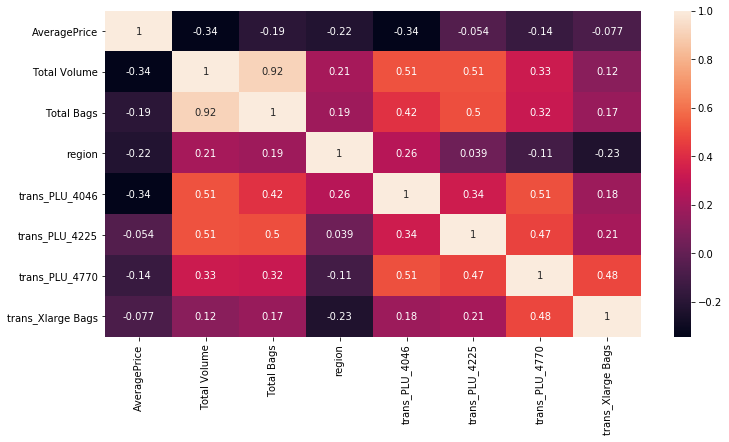

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(new_avocado_ds.corr(),annot = True)

Total Volume and Total bags are highly correlated and we should drop one.


In [55]:
new_avocado_dsX_check = new_avocado_ds.copy()


In [62]:
new_avocado_ds.drop("Total Bags",axis =1, inplace = True)

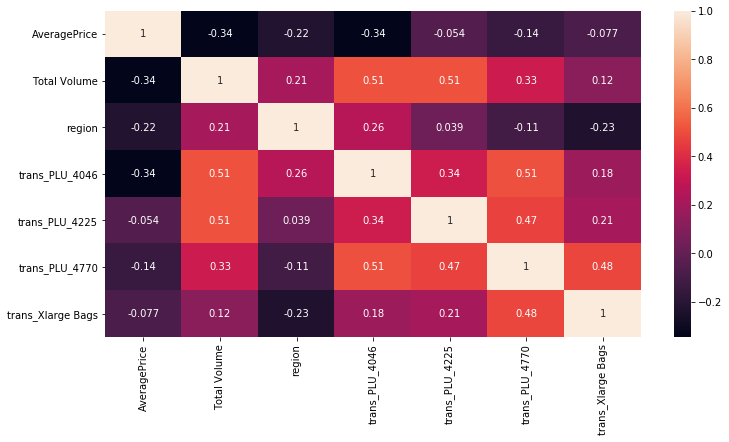

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(new_avocado_ds.corr(),annot = True)

# Data is ready for "Modeling"

In [64]:
# seprate data into train and test and create model

X = new_avocado_ds.drop("AveragePrice",axis =1)
y =new_avocado_ds["AveragePrice"]

# Applying standard scaler to scale the data point.

sc = StandardScaler()
X = sc.fit_transform(X)


# we will find best random state wit this for loop.
for i in range(50,500,75):
    LR = LinearRegression()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    LR.fit(X_train,y_train)
    print("Training_score",LR.score(X_train,y_train),"Random_state",i)
    pred = LR.predict(X_test)
    print("test_score",LR.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")
    



Training_score 0.19869838820001762 Random_state 50
test_score 0.1995176979589789
Mean_squared_error 0.02549721425154033
R2_scoe 0.1995176979589789 

Training_score 0.1967985178696945 Random_state 125
test_score 0.204195870597925
Mean_squared_error 0.027086035563694804
R2_scoe 0.204195870597925 

Training_score 0.20587630233707288 Random_state 200
test_score 0.16139288717246214
Mean_squared_error 0.024883901646120796
R2_scoe 0.16139288717246214 

Training_score 0.19752381356218485 Random_state 275
test_score 0.2027497810184884
Mean_squared_error 0.025670060360866172
R2_scoe 0.2027497810184884 

Training_score 0.19179433425027548 Random_state 350
test_score 0.21839490373146186
Mean_squared_error 0.028297682254727945
R2_scoe 0.21839490373146186 

Training_score 0.2180441716562086 Random_state 425
test_score 0.10714957624331034
Mean_squared_error 0.027600444623727533
R2_scoe 0.10714957624331034 



In [65]:
# testing
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training_score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("test_score",RF.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.9619371180265482 Random_state 50
test_score 0.7372074544341801
Mean_squared_error 0.00837055088028169
R2_scoe 0.7372074544341801 

Training_score 0.9673441805779315 Random_state 100
test_score 0.6992687127800861
Mean_squared_error 0.009886435176056354
R2_scoe 0.6992687127800861 

Training_score 0.9619231628817227 Random_state 150
test_score 0.7458295776461346
Mean_squared_error 0.010286839119718309
R2_scoe 0.7458295776461346 

Training_score 0.9657218558785433 Random_state 200
test_score 0.7112001153220804
Mean_squared_error 0.008569528943661964
R2_scoe 0.7112001153220804 

Training_score 0.963128415316457 Random_state 250
test_score 0.7327711514424733
Mean_squared_error 0.009556170352112673
R2_scoe 0.7327711514424733 

Training_score 0.9644951331360245 Random_state 300
test_score 0.7261993104268224
Mean_squared_error 0.009730722253521116
R2_scoe 0.7261993104268224 

Training_score 0.9639378502912684 Random_state 350
test_score 0.7470539082483151
Mean_squared_error 0.0

In [66]:
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training_score",RF.score(X_train,y_train),"Random_state",i)
    pred = RF.predict(X_test)
    print("test_score",RF.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.9618892691400704 Random_state 50
test_score 0.7392742918623445
Mean_squared_error 0.008304717323943663
R2_scoe 0.7392742918623445 

Training_score 0.9673290476227816 Random_state 100
test_score 0.7057779433186238
Mean_squared_error 0.009672446514084512
R2_scoe 0.7057779433186238 

Training_score 0.9616710240575533 Random_state 150
test_score 0.7443951653491057
Mean_squared_error 0.010344892957746472
R2_scoe 0.7443951653491057 

Training_score 0.9657309182599702 Random_state 200
test_score 0.7098603107988557
Mean_squared_error 0.008609284823943658
R2_scoe 0.7098603107988557 

Training_score 0.9610787870256575 Random_state 250
test_score 0.7224483413201368
Mean_squared_error 0.009925316619718303
R2_scoe 0.7224483413201368 

Training_score 0.9633106785323444 Random_state 300
test_score 0.7326663793445098
Mean_squared_error 0.009500886267605613
R2_scoe 0.7326663793445098 

Training_score 0.9626797515010069 Random_state 350
test_score 0.7510381099191801
Mean_squared_error 0

we have check two algorithm for checking the best random stats. linear regression didnt work well so i tried Randomforest, it is giving somewhat good test score and found best random state.so we will used other model with that randomforest 

In [67]:
models = [LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

for model in models:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.2, random_state =450)
    model.fit(X_train,y_train)
    print("Training_score",model.score(X_train,y_train),"Algorithm",model)
    pred = model.predict(X_test)
    print("test_score",model.score(X_test,y_test))
    print("Mean_squared_error",mean_squared_error(y_test,pred))
    print("R2_scoe",r2_score(y_test,pred),"\n")

Training_score 0.19985775947811701 Algorithm LinearRegression()
test_score 0.1905580240093907
Mean_squared_error 0.02504986875281353
R2_scoe 0.1905580240093907 

Training_score 0.19985755925334336 Algorithm Ridge()
test_score 0.19053662764134027
Mean_squared_error 0.025050530908010994
R2_scoe 0.19053662764134027 

Training_score 0.0 Algorithm Lasso()
test_score -0.0039917765760231205
Mean_squared_error 0.03107061775657807
R2_scoe -0.0039917765760231205 

Training_score 0.9653796175563059 Algorithm RandomForestRegressor()
test_score 0.772036405562669
Mean_squared_error 0.007054808485915494
R2_scoe 0.772036405562669 

Training_score 0.5831080372633258 Algorithm AdaBoostRegressor()
test_score 0.5119732726739763
Mean_squared_error 0.015103004081819249
R2_scoe 0.5119732726739763 

Training_score 1.0 Algorithm DecisionTreeRegressor()
test_score 0.5546578057969576
Mean_squared_error 0.013782042253521124
R2_scoe 0.5546578057969576 

Training_score 0.6713738765896875 Algorithm SVR()
test_score 

KNN is giving best score on trainin as well test so i am selecting it for final model and applying GridSearchCV. Randomforest is kind of overfit model.

In [68]:
RF = RandomForestRegressor()
para = {"n_estimators":[100,200,300],
       "max_depth":[2,3,4,5],
       "max_features":["auto", "sqrt", "log2"]}

grid_search_RF = GridSearchCV(RF,para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_RF.fit(X_train1,y_train1)
print(grid_search_RF.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished


{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 300}


In [69]:
grid_search_RF.best_score_

0.5753661411876376

In [70]:
knn = KNeighborsRegressor()
grid_para = {"n_neighbors":[5,7,10,12],
            "weights":["uniform", "distance"],
            "algorithm" :["auto", "ball_tree", "kd_tree", "brute"],
            "p" :[1,2]}
grid_search_KNN = GridSearchCV(knn,grid_para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_KNN.fit(X_train1,y_train1)
print(grid_search_KNN.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    0.7s


{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    1.7s finished


In [71]:
grid_search_KNN.best_score_

0.706584416718475

we have got the best parameter through Grid Search CV, appying cross_val_score

In [72]:
best_RF = RandomForestRegressor(max_depth = 5,max_features="auto",n_estimators =200)

for i in range(2,10):
    cross_val_report = cross_val_score(best_RF,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())


At 2 mean is  -0.048103662646596886 and the SD is  0.008264538854395091
At 3 mean is  -0.03477308885838542 and the SD is  0.007788179739537784
At 4 mean is  -0.038674503287523095 and the SD is  0.01666102075132143
At 5 mean is  -0.035351926793095886 and the SD is  0.017032384045042998
At 6 mean is  -0.03478837345496212 and the SD is  0.014947514300995505
At 7 mean is  -0.02985196178543439 and the SD is  0.018063444979638344
At 8 mean is  -0.03178689853131309 and the SD is  0.019390830910204694
At 9 mean is  -0.03147845924066818 and the SD is  0.022380399830472703


In [73]:
best_knn =  knn = KNeighborsRegressor(algorithm ="auto",p =1,weights = "distance")

for i in range(2,10):
    cross_val_report = cross_val_score(best_knn,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())


At 2 mean is  -0.04040044654546723 and the SD is  0.003132066015335496
At 3 mean is  -0.040694879423680955 and the SD is  0.004987851991341175
At 4 mean is  -0.032501614934171294 and the SD is  0.011919421727307734
At 5 mean is  -0.0365731160952418 and the SD is  0.011795255656627174
At 6 mean is  -0.0353383949449379 and the SD is  0.008468625864483615
At 7 mean is  -0.03796089064316651 and the SD is  0.013207479031555384
At 8 mean is  -0.03191588173693921 and the SD is  0.01596983975715626
At 9 mean is  -0.041492109806076455 and the SD is  0.028992004787214757


i have checked GridSreach CV on Randomforest and KNN. Using GridSreachCV on randomforest because it was overfit model and though of that by hyperparameter tuning we can save the overfitting but KNN is working robust in this situation.
we have seen that cross_val_score at 4 iteration, it isgood other than that. Thus it is the better that other. we will save the same model for future use.  

# Modeling saving

In [74]:
best_knn.fit(X,y)
import pickle
filename = "Avocado.pkl"
with open(filename,"wb") as f:
    pickle.dump(best_knn,f)


# **Conclusion**<br>
As we already mentioned that dataset had lot of missing value which we handled. Outlier and skewness also get corrected.We have done analysis 
and check the trend also. i have checked correlation and VIF, it has observed that predictor are correlated thus multicolinerrity was in existance.it ought to be treated and we did that and data was ready for Modeling.<br><br>Dataset has been segrigated into train and test with best random state.<br>Data has been trained on multiple models like linear regression , ensemble methods. support vector machine and KNN, among all the algorithms, KNN has given good test and train accuracy.<br> KNN is picked as final Model and applied Gridsearch CV to find the best parameter to train it further.We got these {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} best parameter, i have used these parameter with cross_val_score and saved model with these parameter.     
